In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torch.nn.functional as F
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle
import pdb

from utils import *

SyntaxError: invalid syntax (utils.py, line 319)

In [3]:
CH = 'all'
device = torch.device('cuda')
val_dates = ['180330','180331']
test_dates = ['180328','180329']
#load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/'
# save_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_2_upsample'
save_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/Goose_ANN_models/'
model_name = 'MLP_all_ch_Drop_03'

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files, load_path, batch_size=128)

In [4]:
len(train_loader), len(val_loader), len(test_loader)

(446, 49, 21)

In [5]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 62, 100, 10])
torch.Size([128, 1])
128
128
128


date:180325, rec:003, time:7064.0, label:1.0
date:180325, rec:009, time:4368.0, label:0.0


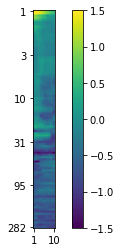

date:180410, rec:005, time:4642.0, label:1.0
date:180414, rec:001, time:6703.0, label:1.0
date:180413, rec:001, time:7137.0, label:0.0


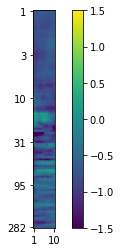

date:180414, rec:007, time:5248.0, label:0.0


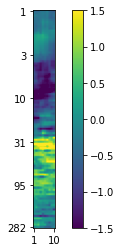

date:180411, rec:006, time:4826.0, label:1.0
date:180325, rec:007, time:1133.0, label:0.0


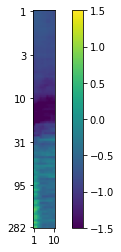

date:180414, rec:001, time:430.0, label:0.0


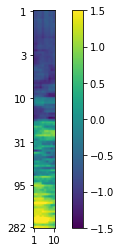

date:180325, rec:001, time:2588.0, label:1.0
date:180413, rec:001, time:2140.0, label:0.0


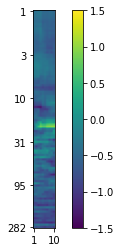

date:180401, rec:001, time:870.0, label:0.0


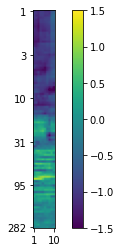

date:180409, rec:006, time:5628.0, label:0.0


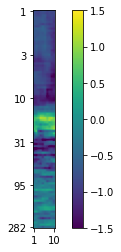

date:180409, rec:002, time:4139.0, label:0.0


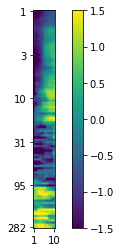

date:180413, rec:001, time:3683.0, label:0.0


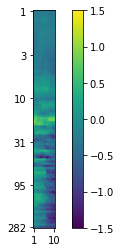

date:180412, rec:006, time:3988.0, label:0.0


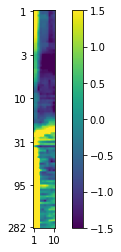

date:180327, rec:007, time:3710.0, label:0.0


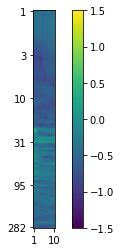

date:180413, rec:002, time:6691.0, label:0.0


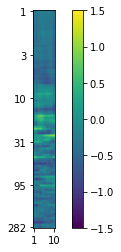

date:180410, rec:006, time:5642.0, label:0.0


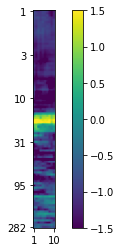

date:180413, rec:008, time:5213.0, label:1.0
date:180411, rec:007, time:2249.0, label:0.0


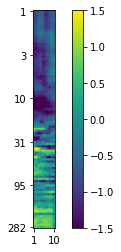

date:180413, rec:006, time:5834.0, label:1.0
date:180411, rec:002, time:410.0, label:1.0
date:180323, rec:007, time:1919.0, label:0.0


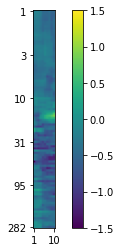

date:180413, rec:005, time:4098.0, label:1.0
date:180326, rec:003, time:5183.0, label:0.0


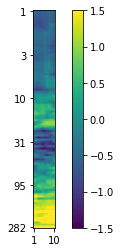

date:180411, rec:007, time:1300.0, label:0.0


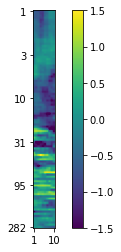

date:180413, rec:002, time:1270.0, label:0.0


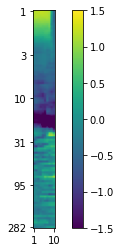

date:180327, rec:002, time:5524.0, label:1.0
date:180322, rec:005, time:5894.0, label:1.0
date:180413, rec:002, time:4341.0, label:0.0


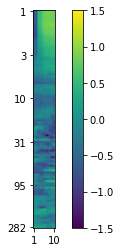

date:180414, rec:007, time:5188.0, label:0.0


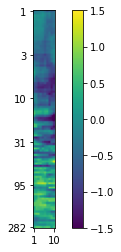

date:180324, rec:008, time:2191.0, label:0.0


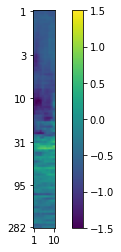

date:180325, rec:006, time:2302.0, label:1.0
date:180323, rec:003, time:967.0, label:1.0
date:180413, rec:002, time:6801.0, label:0.0


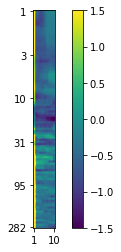

date:180325, rec:007, time:4343.0, label:0.0


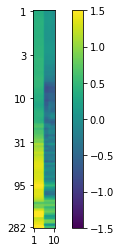

date:180414, rec:007, time:4798.0, label:0.0


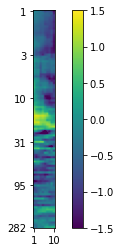

date:180413, rec:003, time:4586.0, label:1.0
date:180324, rec:001, time:5350.0, label:0.0


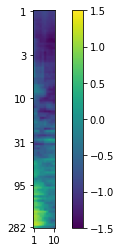

date:180327, rec:008, time:150.0, label:0.0


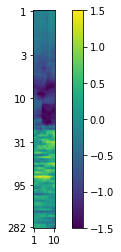

date:180327, rec:005, time:410.0, label:1.0
date:180327, rec:007, time:4330.0, label:0.0


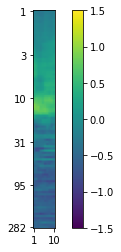

date:180401, rec:003, time:260.0, label:1.0
date:180410, rec:006, time:4539.0, label:1.0
date:180413, rec:001, time:600.0, label:0.0


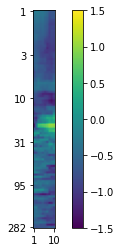

date:180409, rec:005, time:1650.0, label:1.0
date:180327, rec:007, time:6931.0, label:0.0


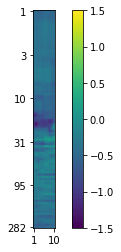

date:180412, rec:006, time:1333.0, label:1.0
date:180327, rec:001, time:1540.0, label:0.0


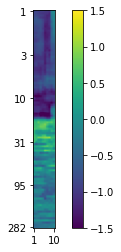

date:180411, rec:005, time:1180.0, label:1.0
date:180409, rec:003, time:2809.0, label:1.0
date:180323, rec:004, time:4579.0, label:1.0
date:180409, rec:006, time:5828.0, label:0.0


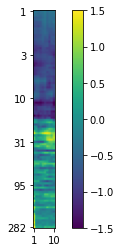

date:180412, rec:001, time:6982.0, label:1.0
date:180323, rec:007, time:2915.0, label:0.0


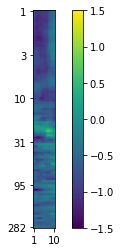

date:180327, rec:008, time:5103.0, label:0.0


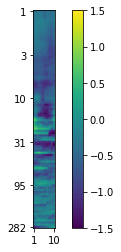

date:180324, rec:006, time:6723.0, label:0.0


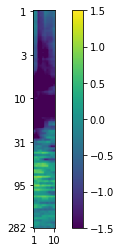

date:180412, rec:001, time:6862.0, label:1.0
date:180413, rec:002, time:6171.0, label:0.0


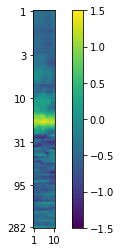

date:180414, rec:003, time:585.0, label:1.0
date:180325, rec:001, time:3222.0, label:0.0


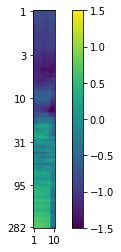

date:180413, rec:002, time:1920.0, label:0.0


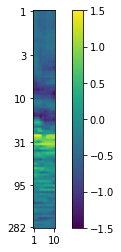

date:180410, rec:006, time:3344.0, label:1.0
date:180323, rec:002, time:310.0, label:1.0
date:180325, rec:005, time:4156.0, label:0.0


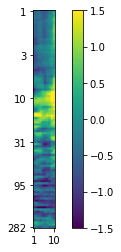

date:180412, rec:005, time:2205.0, label:0.0


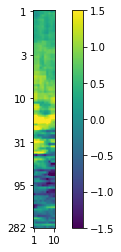

date:180327, rec:002, time:1240.0, label:1.0
date:180322, rec:002, time:300.0, label:1.0
date:180411, rec:006, time:5146.0, label:1.0
date:180414, rec:007, time:4508.0, label:0.0


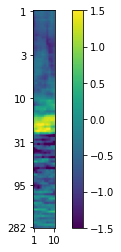

date:180323, rec:002, time:880.0, label:1.0
date:180327, rec:008, time:1862.0, label:0.0


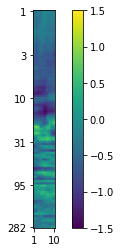

date:180323, rec:002, time:890.0, label:1.0
date:180324, rec:009, time:270.0, label:0.0


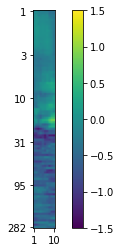

date:180409, rec:003, time:3239.0, label:1.0
date:180411, rec:003, time:3203.0, label:1.0
date:180327, rec:005, time:6068.0, label:0.0


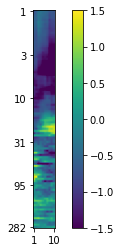

date:180411, rec:002, time:440.0, label:1.0
date:180323, rec:007, time:2389.0, label:0.0


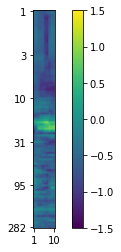

date:180410, rec:006, time:1976.0, label:1.0
date:180327, rec:007, time:2880.0, label:0.0


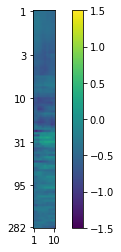

date:180411, rec:005, time:1480.0, label:1.0
date:180413, rec:003, time:600.0, label:0.0


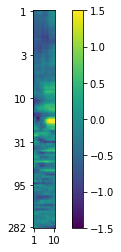

date:180327, rec:007, time:4941.0, label:0.0


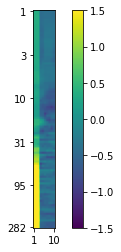

date:180327, rec:005, time:2820.0, label:1.0
date:180324, rec:004, time:4819.0, label:1.0
date:180325, rec:007, time:3455.0, label:0.0


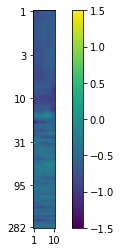

date:180411, rec:004, time:1806.0, label:0.0


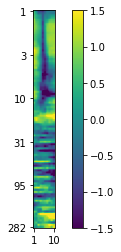

date:180327, rec:007, time:3870.0, label:0.0


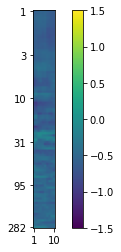

date:180327, rec:005, time:2113.0, label:0.0


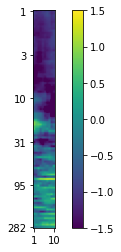

date:180327, rec:008, time:130.0, label:0.0


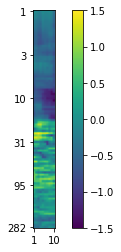

date:180413, rec:002, time:6371.0, label:0.0


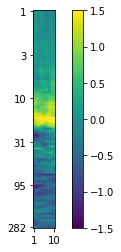

date:180325, rec:002, time:7089.0, label:1.0
date:180327, rec:007, time:3450.0, label:0.0


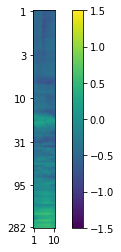

date:180324, rec:008, time:5164.0, label:0.0


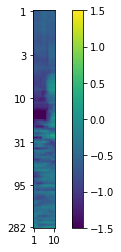

date:180414, rec:004, time:3126.0, label:1.0
date:180410, rec:002, time:2865.0, label:1.0
date:180410, rec:003, time:4598.0, label:1.0
date:180324, rec:004, time:2279.0, label:1.0
date:180327, rec:001, time:2715.0, label:1.0
date:180414, rec:007, time:2187.0, label:0.0


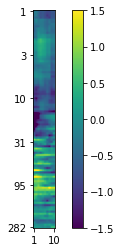

date:180409, rec:003, time:6097.0, label:1.0
date:180327, rec:007, time:4501.0, label:0.0


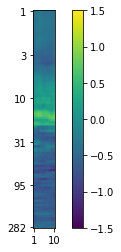

date:180325, rec:001, time:1710.0, label:0.0


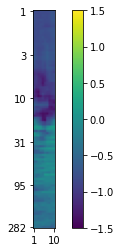

date:180413, rec:002, time:4281.0, label:0.0


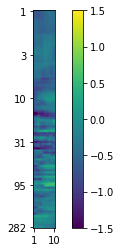

date:180326, rec:004, time:2639.0, label:1.0
date:180411, rec:002, time:4747.0, label:1.0
date:180414, rec:001, time:1730.0, label:0.0


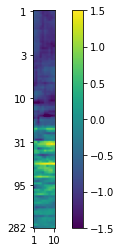

date:180325, rec:005, time:4463.0, label:1.0
date:180325, rec:007, time:6823.0, label:0.0


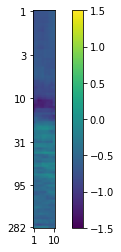

date:180411, rec:004, time:6623.0, label:1.0
date:180410, rec:004, time:1488.0, label:1.0
date:180409, rec:004, time:1550.0, label:1.0
date:180414, rec:007, time:4948.0, label:0.0


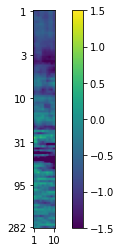

date:180413, rec:004, time:3884.0, label:1.0
date:180323, rec:002, time:1887.0, label:1.0
date:180413, rec:001, time:2220.0, label:0.0


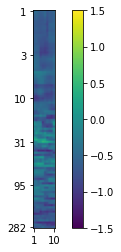

date:180323, rec:007, time:4772.0, label:0.0


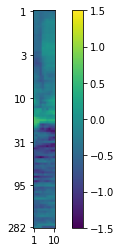

date:180411, rec:003, time:5290.0, label:1.0
date:180413, rec:003, time:5571.0, label:0.0


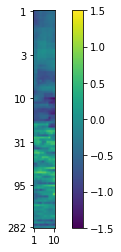

date:180327, rec:008, time:4553.0, label:0.0


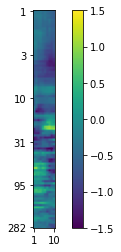

date:180412, rec:001, time:6160.0, label:1.0
date:180327, rec:007, time:6671.0, label:0.0


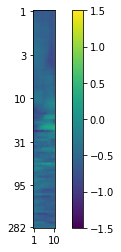

date:180324, rec:008, time:2378.0, label:0.0


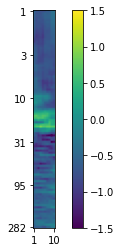

date:180413, rec:003, time:5851.0, label:0.0


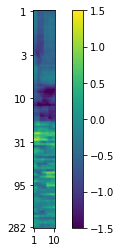

date:180327, rec:001, time:7177.0, label:1.0
date:180414, rec:004, time:2170.0, label:1.0


In [5]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
            plt.xticks(ticks=[0, 9], labels=[1, 10])
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

In [6]:
class MLP(nn.Module): # add dropo
    def __init__(self, input_dim=100*10*62, output_dim=1, embed_dim=256,drop_prob=0.):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, embed_dim)
        self.linear2 = nn.Linear(embed_dim, output_dim)
        self.dropout = nn.Dropout(drop_prob)
        
    def forward(self, x):
        
        x = x.reshape([x.shape[0], 1, -1]).float()
        x = self.dropout(F.relu(self.linear1(x)))
        outputs = self.linear2(x)
        
        return outputs

In [7]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'MLP'
loss_type = 'bce'
reg_type = 'none'
input_dim = 62*10*100
embed_dim = 256
p = 0.3


model = MLP(input_dim=input_dim, embed_dim=embed_dim,drop_prob = p).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
model

MLP(
  (linear1): Linear(in_features=62000, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [8]:
(data, labels, _, _, _) = next(iter(train_loader))
data = data.to(device)
output = model(data)
output.shape

torch.Size([128, 1, 1])

In [9]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, 
                                  reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, 
                                 reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EMBED{}_EPOCH{}_MODEL_{}.pt'.format(
                save_path, model_type, CH, loss_type, reg_type, alpha, embed_dim, epoch,model_name))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 4.019362449645996
Val loss for epoch 0: 1.370093822479248
Train loss for epoch 1: 1.6920430660247803
Val loss for epoch 1: 0.9401935935020447
1
Train loss for epoch 2: 1.2751846313476562
Val loss for epoch 2: 0.8741018176078796
2
Train loss for epoch 3: 0.9233509302139282
Val loss for epoch 3: 0.8770278692245483
Train loss for epoch 4: 0.8941699266433716
Val loss for epoch 4: 0.8571066856384277
4
Train loss for epoch 5: 0.7399224042892456
Val loss for epoch 5: 0.7762917876243591
5
Train loss for epoch 6: 0.7830199003219604
Val loss for epoch 6: 0.726963222026825
6
Train loss for epoch 7: 0.8494252562522888
Val loss for epoch 7: 0.7751378417015076
Train loss for epoch 8: 0.866938591003418
Val loss for epoch 8: 1.0191007852554321
Train loss for epoch 9: 0.7988349199295044
Val loss for epoch 9: 1.2886558771133423
Train loss for epoch 10: 0.8722512125968933
Val loss for epoch 10: 1.260628581047058
Train loss for epoch 11: 1.1866604089736938
Val loss for epoch 11: 1.

KeyboardInterrupt: 

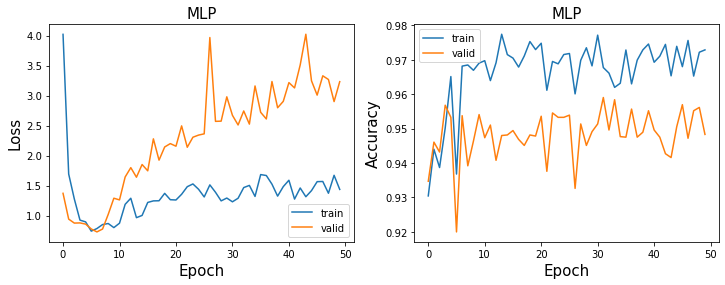

In [10]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # embed_dim=64

In [11]:
model = MLP(input_dim=input_dim, embed_dim=embed_dim).to(device)
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EMBED{}_EPOCH{}_MODEL_{}.pt'.format(
    save_path, model_type, CH, loss_type, reg_type, alpha, embed_dim, best_epoch,model_name)))

<All keys matched successfully>

In [12]:
w1 = model.linear1.weight
w1.shape

torch.Size([256, 62000])

In [13]:
w1 = model.linear1.weight.view(256,62,10,100)
w2 = model.linear2.weight
print(w1.shape, w2.shape)
w1 = w1.detach().cpu().numpy()
w2 = w2.detach().cpu().numpy()
w1[0][0].shape

torch.Size([256, 62, 10, 100]) torch.Size([1, 256])


(10, 100)

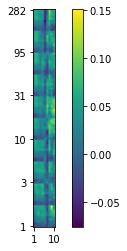

In [14]:
plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
plt.xticks(ticks=[0, 9], labels=[1, 10])
plt.imshow(w1[0][0].transpose(),origin='lower')
# plt.clim(-1.5, 1.5)
plt.colorbar()
plt.show()

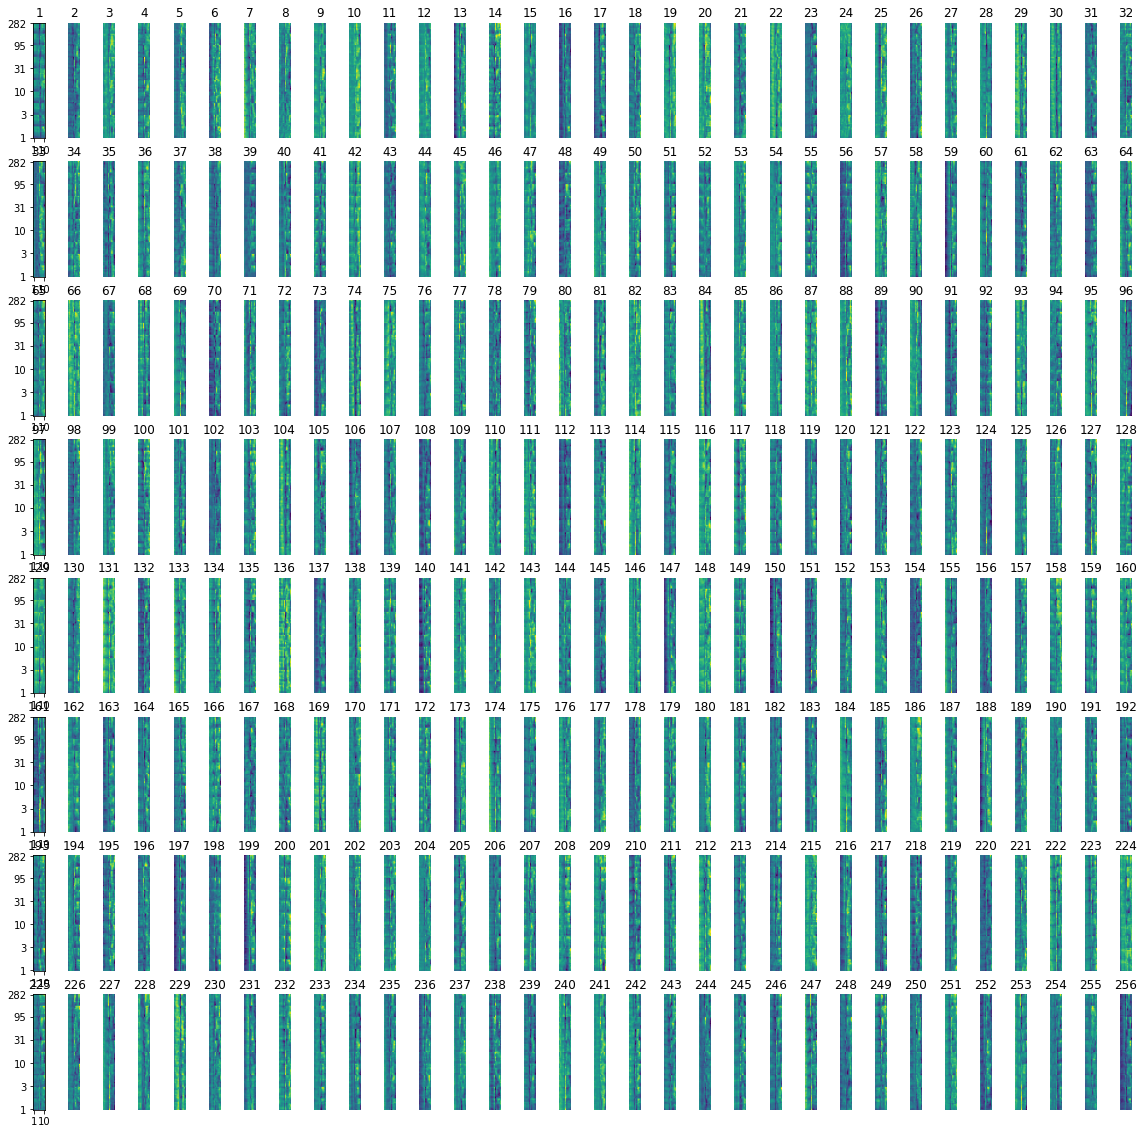

In [15]:
timewindow = 10
plt.figure(figsize=(20,20))
ylabels_list = [0,32,64,96,128,160,192,224,256] 
for i in range(256):
    weights_sub = w1[i]
    plt.subplot(8,32,i+1)
    if i in ylabels_list:
        plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
        plt.xticks(ticks=[0, timewindow-1], labels=[1, timewindow])
    else:
        plt.axis('off')
#     plt.imshow(weights_sub)
    plt.imshow(w1[i][0].transpose(),origin='lower')
    plt.title(str(i+1))
plt.show()

In [16]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7395707964897156 accuracy:0.9494104222137695


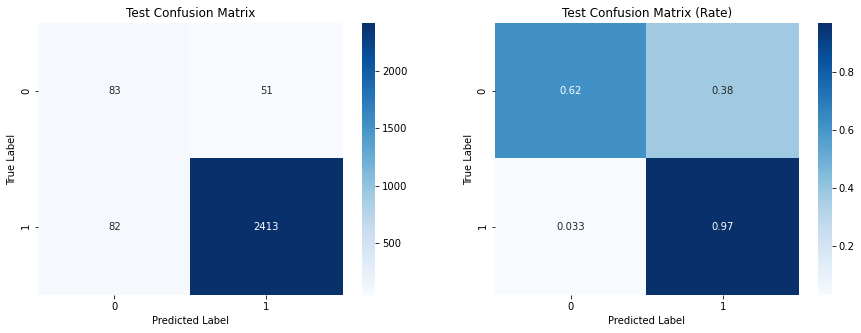

In [17]:
plot_confusion(test_preds, test_labels)